In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv("Mall_Customers.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
label_encoder = LabelEncoder()
if 'Gender' in df.columns:
    df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male=1, Female=0

In [7]:
if 'CustomerID' in df.columns:
    df.drop('CustomerID', axis=1, inplace=True)

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

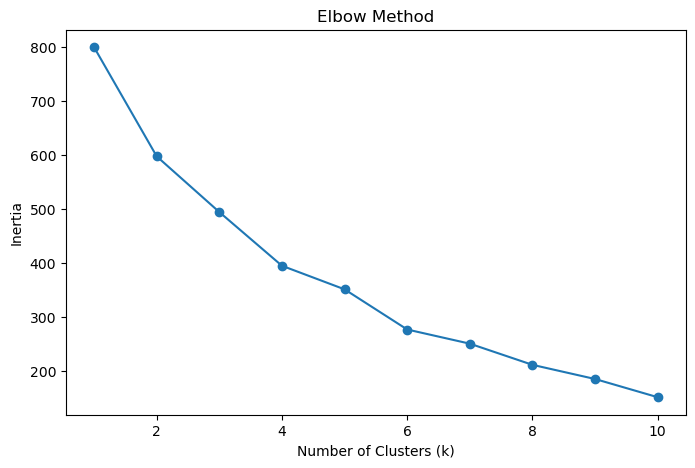

In [11]:
inertia_scores = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [13]:
optimal_k = 5

In [15]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters


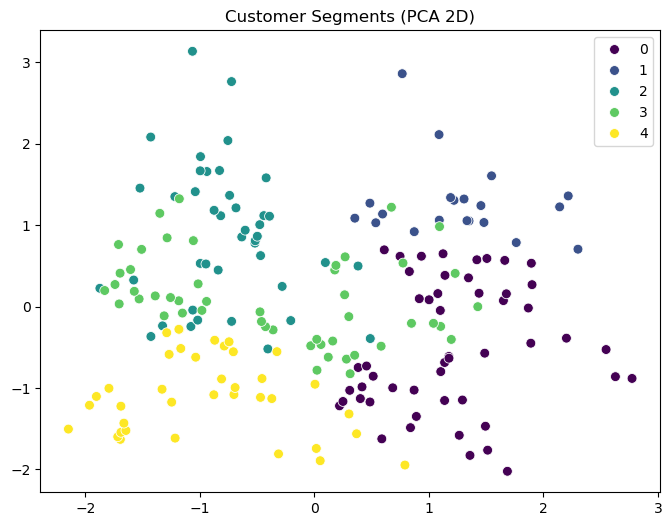

In [17]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=clusters, palette='viridis', s=50)
plt.title('Customer Segments (PCA 2D)')
plt.show()

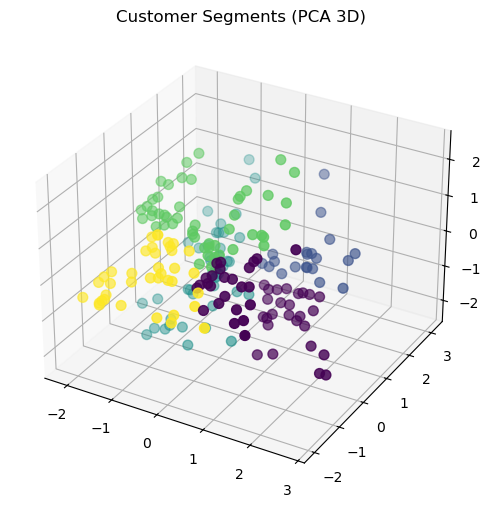

In [19]:
pca_3d = PCA(n_components=3)
pca_data_3d = pca_3d.fit_transform(scaled_data)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data_3d[:,0], pca_data_3d[:,1], pca_data_3d[:,2],
           c=clusters, cmap='viridis', s=50)
ax.set_title("Customer Segments (PCA 3D)")
plt.show()


In [21]:
score = silhouette_score(scaled_data, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.27191023466188324


In [ ]:
df.to_csv("mall_customers_with_clusters.csv", index=False)
print("✅ Final dataset with clusters saved!")